<a href="https://colab.research.google.com/github/ginasaniap/AB_Testing/blob/main/Kel_6_AB_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wandakinasih/gg2/main/ab_data.csv', sep=',')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
multi_users

3894

In [ ]:
i= session_counts[session_counts > 1].index
df= df[~df['user_id'].isin(i)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


In [ ]:
not_aligned= df[(((df.group == 'treatment')== (df.landing_page == 'new_page'))|((df.group == 'control')== (df.landing_page == 'old_page'))) == False]
len(not_aligned)

0

In [ ]:
df.sort_values(by=['landing_page', 'converted'])

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
...,...,...,...,...,...
294383,728029,2017-01-11 11:17:05.291493,control,old_page,1
294385,850065,2017-01-17 11:57:18.569907,control,old_page,1
294405,712217,2017-01-11 10:34:30.176801,control,old_page,1
294420,795742,2017-01-09 01:06:58.299207,control,old_page,1


In [ ]:
#treatment
df_treatment= df[df['group']== 'treatment']
converted_tr = df_treatment[df_treatment.converted == 1 ]
not_converted_tr = df_treatment[df_treatment.converted == 0 ]
print(f"converted= {len(converted_tr)}, not converted= {len(not_converted_tr)}")

converted= 17025, not converted= 126372


In [ ]:
#control
df_control= df[df['group']== 'control']
converted_cr = df_control[df_control.converted == 1]
not_converted_cr = df_control[df_control.converted == 0]
print(f"converted= {len(converted_cr)}, not converted= {len(not_converted_cr)}")

converted= 17220, not converted= 126073


In [ ]:
#treatment
CR_tr = len(converted_tr)/len(df_treatment)
print(CR_tr)

0.11872633318688676


In [ ]:
#control
CR_cr = len(converted_cr)/len(df_control)
print(CR_cr)

0.12017335110577627


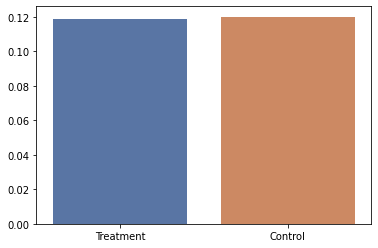

In [ ]:
x= ['Treatment', 'Control']
y= [CR_tr, CR_cr]
sns.barplot(x=x, y=y, palette="deep")

In [ ]:
from scipy.stats import norm

X_con = len(converted_cr) #control converted
N_con = len(converted_cr+not_converted_cr) #total control
X_exp = len(converted_tr) #treatment converted
N_exp = len(converted_tr+not_converted_tr) #total treatment
print(X_con)
print(N_con)
print(X_exp)
print(N_exp)

17220
143293
17025
143397


Test Statistics stat:  1.1944850812796501
Z-critical:  1.959963984540054
P_value:  0.23228827305833621
Confidence Interval of 2 sample Z-test for proportions:  [-0.  0.]


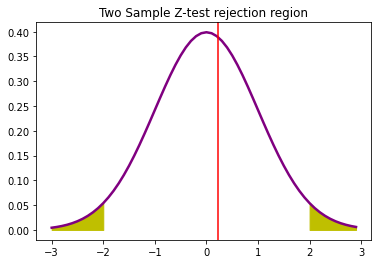

In [ ]:
# Significance Level
alpha = 0.05

p_con_hat = X_con / N_con
p_exp_hat = X_exp / N_exp

p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled_hat*(1-p_pooled_hat) * (1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance)

# test statsitics
Test_stat = (p_con_hat - p_exp_hat)/SE
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)

# Margin of error
m = SE * Z_crit
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2

# Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE * Z_crit, (p_con_hat-p_exp_hat) + SE * Z_crit]

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(p_value)

print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))


z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.axvline(x = p_value, color = "red", label = "Probability Value")
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
#plt.legend()
plt.show()